In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [8]:
df = mb.bindome.datasets.ProBound.ctcf(flank_length=0)
df = df.sort_values(1, ascending=False).reset_index(drop=True)

In [9]:
df

,seq,0,1
0,TATTCCATGTAGACCGGCCATTGGACTATG,0,4
1,CCCTAGCGTTGATGGTATCGTAAGTGCGTC,0,4
2,TAATTAGTGGCTGCTTGTCGGAATGGGCAG,0,4
3,GAGGGGGCGTTACGCGTTGTGTAGACCTAA,0,4
4,AGGACCTCAGGTGGAATCTTTTTACTATTG,0,4
...,...,...,...
120091,ATATCAGAGAGACAGGACTTGTGACTTTGT,1,0
120092,ATATCAGAGGGCGTTCGAGGCTTGCTAGGC,1,0
120093,GGATGGGAGTGCCTTTTGGATGAAAGATTG,1,0
120094,GGATGGCTTGAGTAACCAAGGATTGCGTGG,1,0


In [13]:
# data = df.head(1000)
data = df.sample(n=1000)
# data = df.copy()

In [14]:
n_rounds = 1
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [15]:
set(data[0])

{0, 1}

In [16]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [205]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=67500, shuffle=True)

loading object (# entries) 1000


In [206]:
# train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [207]:
import numpy as np



##NEW JOB
ignore kernel 1
# rounds 1
# batches 1
# enr_series True
next w 14 <class 'int'>

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0


before kernel optimization.


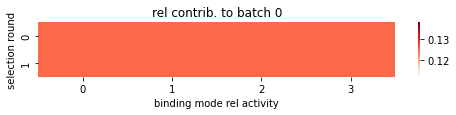


#activities
[[[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


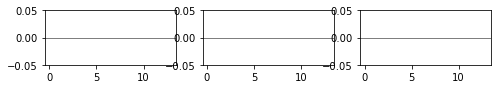

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


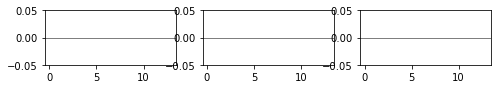

kernels mask [0 1 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.01, dir weight= 0
Epoch:  1, Loss: 0.847962 , best epoch: -1 secs per epoch: 0.050 s
Epoch: 11, Loss: 0.843697 , best epoch: 7 secs per epoch: 0.047 s
Epoch: 21, Loss: 0.843879 , best epoch: 14 secs per epoch: 0.045 s
Epoch: 25, Loss: 0.8438 , best epoch: 14 secs per epoch: 0.044 s
early stop!

##After kernel opt / before shift optim.


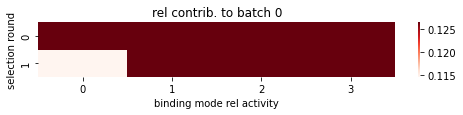


#activities
[[[1.0001874  0.90670156]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.0979, -0.0979]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


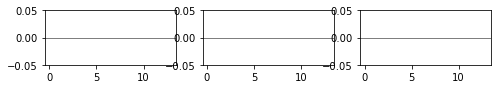

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


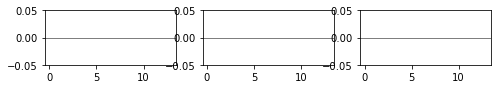

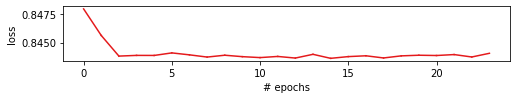

after shift optimz model


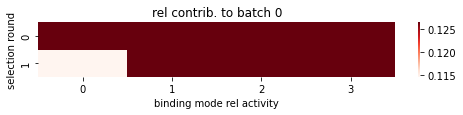


#activities
[[[1.0001874  0.90670156]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.0979, -0.0979]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


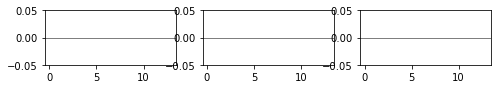

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


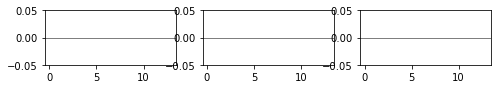

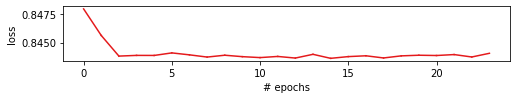




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 

kernels mask [0 1 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.01, dir weight= 0
Epoch:  1, Loss: 0.844080 , best epoch: -1 secs per epoch: 0.071 s
Epoch: 11, Loss: 0.843601 , best epoch: 9 secs per epoch: 0.048 s
Epoch: 21, Loss: 0.843801 , best epoch: 10 secs per epoch: 0.045 s
Epoch: 21, Loss: 0.8438 , best epoch: 10 secs per epoch: 0.045 s
early stop!

Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0


before kernel optimization.


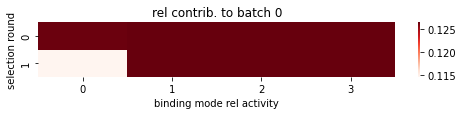


#activities
[[[0.999182  0.9061384]
  [1.        1.       ]
  [1.        1.       ]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.0986, -0.0986]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


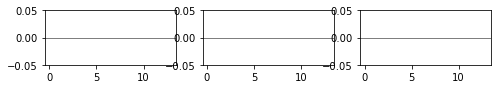

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


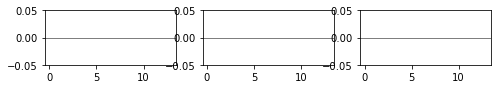

kernels mask [0 0 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 1.683911 , best epoch: -1 secs per epoch: 0.054 s
Epoch: 11, Loss: 0.844287 , best epoch: 9 secs per epoch: 0.058 s
Epoch: 21, Loss: 0.843795 , best epoch: 19 secs per epoch: 0.055 s
Epoch: 31, Loss: 0.843591 , best epoch: 26 secs per epoch: 0.055 s
Epoch: 41, Loss: 0.843283 , best epoch: 33 secs per epoch: 0.054 s
Epoch: 51, Loss: 0.842975 , best epoch: 47 secs per epoch: 0.053 s
Epoch: 61, Loss: 0.842705 , best epoch: 59 secs per epoch: 0.053 s
Epoch: 71, Loss: 0.842703 , best epoch: 69 secs per epoch: 0.053 s
Epoch: 81, Loss: 0.842381 , best epoch: 77 secs per epoch: 0.053 s
Epoch: 91, Loss: 0.842297 , best epoch: 89 secs per epoch: 0.053 s
Epoch: 101, Loss: 0.842038 , best epoch: 91 secs per epoch: 0.052 s
Epoch: 102, Loss: 0.8422 , best epoch: 91 secs per epoch: 0.052 s
early stop!

##After kernel opt / be

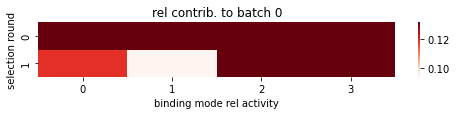


#activities
[[[0.999182  0.9061384]
  [1.0000017 0.7176425]
  [1.        1.       ]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.4729, -0.4729]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


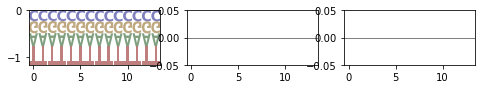

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


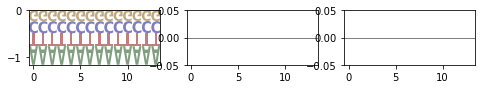

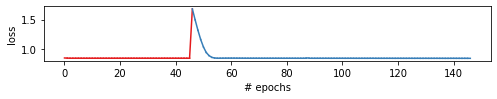


optimize_motif_shift (first)...next shift: -3
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.863662 , best epoch: -1 secs per epoch: 0.107 s
Epoch: 11, Loss: 0.863868 , best epoch: 7 secs per epoch: 0.064 s
Epoch: 18, Loss: 0.8635 , best epoch: 7 secs per epoch: 0.057 s
early stop!
next shift: -2
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.851154 , best epoch: -1 secs per epoch: 0.048 s
Epoch: 11, Loss: 0.851126 , best epoch: 4 secs per epoch: 0.053 s
Epoch: 21, Loss: 0.851136 , best epoch: 13 secs per epoch: 0.050 s
Epoch: 24, Loss: 0.8512 , best epoch: 13 secs per epoch: 0.050 s
early stop!
next shift: -1
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.8445

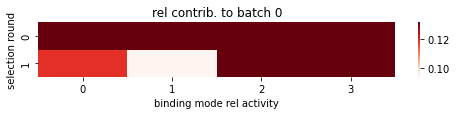


#activities
[[[0.999182  0.9061384]
  [1.0000017 0.7176425]
  [1.        1.       ]
  [1.        1.       ]]]

#log_etas
Parameter containing:
tensor([[ 0.4729, -0.4729]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


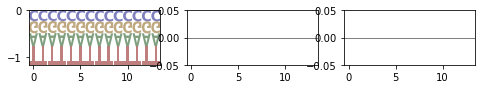

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


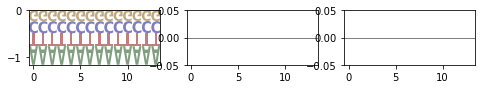

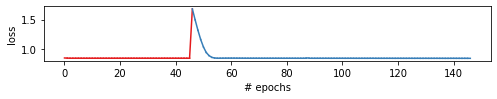




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 

kernels mask [0 0 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.842564 , best epoch: -1 secs per epoch: 0.052 s
Epoch: 11, Loss: 0.841445 , best epoch: 9 secs per epoch: 0.053 s
Epoch: 21, Loss: 0.841161 , best epoch: 15 secs per epoch: 0.050 s
Epoch: 31, Loss: 0.840688 , best epoch: 29 secs per epoch: 0.051 s
Epoch: 41, Loss: 0.840758 , best epoch: 37 secs per epoch: 0.052 s
Epoch: 51, Loss: 0.840251 , best epoch: 48 secs per epoch: 0.051 s
Epoch: 61, Loss: 0.840117 , best epoch: 58 secs per epoch: 0.050 s
Epoch: 71, Loss: 0.839385 , best epoch: 67 secs per epoch: 0.050 s
Epoch: 81, Loss: 0.837830 , best epoch: 79 secs per epoch: 0.050 s
Epoch: 91, Loss: 0.835904 , best epoch: 89 secs per epoch: 0.050 s

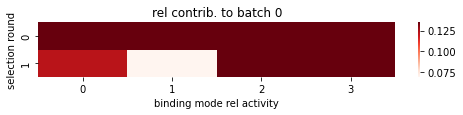


#activities
[[[0.999182   0.9061384 ]
  [0.9999951  0.51501364]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.1151, -1.1151]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


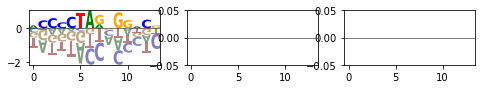

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


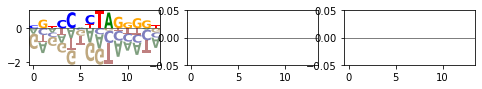

kernels mask [0 0 0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 1.159786 , best epoch: -1 secs per epoch: 0.050 s
Epoch: 11, Loss: 0.821433 , best epoch: 7 secs per epoch: 0.055 s
Epoch: 21, Loss: 0.819529 , best epoch: 18 secs per epoch: 0.054 s
Epoch: 31, Loss: 0.819554 , best epoch: 29 secs per epoch: 0.052 s
Epoch: 41, Loss: 0.818643 , best epoch: 34 secs per epoch: 0.051 s
Epoch: 51, Loss: 0.818764 , best epoch: 47 secs per epoch: 0.051 s
Epoch: 61, Loss: 0.818361 , best epoch: 54 secs per epoch: 0.050 s
Epoch: 71, Loss: 0.818153 , best epoch: 69 secs per epoch: 0.050 s
Epoch: 81, Loss: 0.817643 , best epoch: 74 secs per epoch: 0.050 s
Epoch: 91, Loss: 0.817762 , best epoch: 80 secs per epoch: 0.050 s
Epoch: 91, Loss: 0.8178 , best epoch: 80 secs per epoch: 0.050 s
early stop!

##After kernel opt / before shift optim.


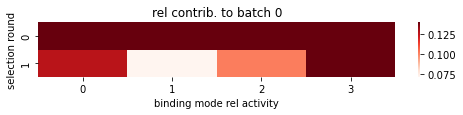


#activities
[[[0.999182   0.9061384 ]
  [0.9999951  0.51501364]
  [1.         0.7272441 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.1987, -1.1987]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


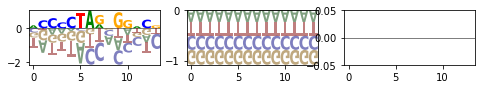

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


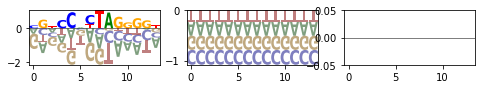

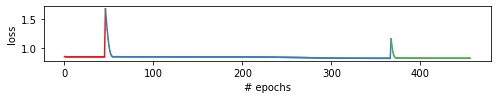


optimize_motif_shift (first)...next shift: -3
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.822645 , best epoch: -1 secs per epoch: 0.046 s
Epoch: 11, Loss: 0.822751 , best epoch: 3 secs per epoch: 0.047 s
Epoch: 21, Loss: 0.822598 , best epoch: 11 secs per epoch: 0.045 s
Epoch: 22, Loss: 0.8225 , best epoch: 11 secs per epoch: 0.045 s
early stop!
next shift: -2
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.820072 , best epoch: -1 secs per epoch: 0.045 s
Epoch: 11, Loss: 0.820084 , best epoch: 7 secs per epoch: 0.050 s
Epoch: 18, Loss: 0.8201 , best epoch: 7 secs per epoch: 0.048 s
early stop!
next shift: -1
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.8186

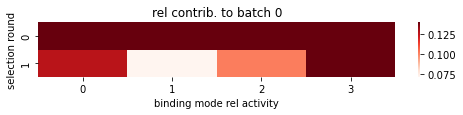


#activities
[[[0.999182   0.9061384 ]
  [0.9999951  0.51501364]
  [1.         0.7272441 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.1987, -1.1987]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


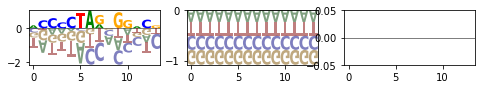

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


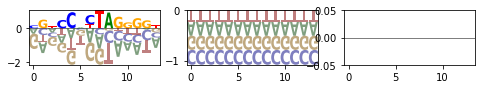

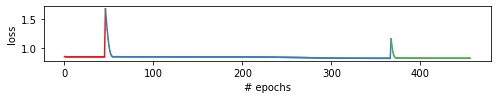




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 

kernels mask [0 0 0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.818061 , best epoch: -1 secs per epoch: 0.048 s
Epoch: 11, Loss: 0.817364 , best epoch: 8 secs per epoch: 0.053 s
Epoch: 21, Loss: 0.817678 , best epoch: 11 secs per epoch: 0.050 s
Epoch: 22, Loss: 0.8177 , best epoch: 11 secs per epoch: 0.050 s
early stop!

Kernel to optimize 3

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 1


before kernel optimization.


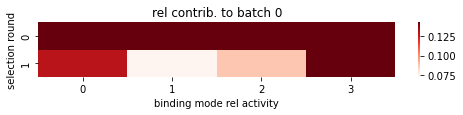


#activities
[[[0.999182   0.9061384 ]
  [0.9999951  0.51501364]
  [0.99993175 0.6190837 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.1724, -1.1724]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


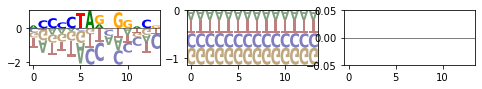

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


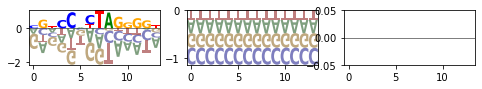

kernels mask [0 0 0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 1.135965 , best epoch: -1 secs per epoch: 0.051 s
Epoch: 11, Loss: 0.822412 , best epoch: 7 secs per epoch: 0.053 s
Epoch: 21, Loss: 0.820652 , best epoch: 18 secs per epoch: 0.051 s
Epoch: 31, Loss: 0.819840 , best epoch: 26 secs per epoch: 0.051 s
Epoch: 41, Loss: 0.819685 , best epoch: 34 secs per epoch: 0.050 s
Epoch: 51, Loss: 0.819375 , best epoch: 48 secs per epoch: 0.051 s
Epoch: 61, Loss: 0.819236 , best epoch: 54 secs per epoch: 0.051 s
Epoch: 71, Loss: 0.818954 , best epoch: 67 secs per epoch: 0.050 s
Epoch: 81, Loss: 0.819063 , best epoch: 79 secs per epoch: 0.050 s
Epoch: 91, Loss: 0.818925 , best epoch: 88 secs per epoch: 0.050 s
Epoch: 99, Loss: 0.8187 , best epoch: 88 secs per epoch: 0.050 s
early stop!

##After kernel opt / before shift optim.


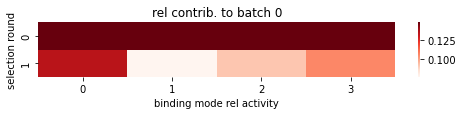


#activities
[[[0.999182   0.9061384 ]
  [0.9999951  0.51501364]
  [0.99993175 0.6190837 ]
  [1.0000012  0.71380687]]]

#log_etas
Parameter containing:
tensor([[ 1.2498, -1.2498]], requires_grad=True)


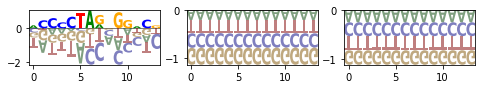

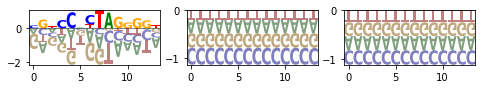

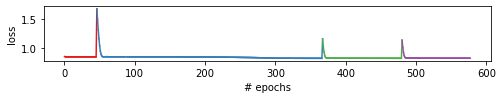


optimize_motif_shift (first)...next shift: -3
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.822375 , best epoch: -1 secs per epoch: 0.047 s
Epoch: 11, Loss: 0.822531 , best epoch: 9 secs per epoch: 0.050 s
Epoch: 21, Loss: 0.822446 , best epoch: 17 secs per epoch: 0.049 s
Epoch: 28, Loss: 0.8223 , best epoch: 17 secs per epoch: 0.049 s
early stop!
next shift: -2
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.820466 , best epoch: -1 secs per epoch: 0.048 s
Epoch: 11, Loss: 0.820725 , best epoch: 9 secs per epoch: 0.054 s
Epoch: 20, Loss: 0.8205 , best epoch: 9 secs per epoch: 0.052 s
early stop!
next shift: -1
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.8194

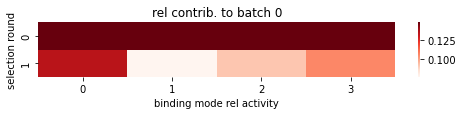


#activities
[[[0.999182   0.9061384 ]
  [0.9999951  0.51501364]
  [0.99993175 0.6190837 ]
  [1.0000012  0.71380687]]]

#log_etas
Parameter containing:
tensor([[ 1.2498, -1.2498]], requires_grad=True)


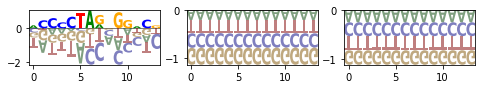

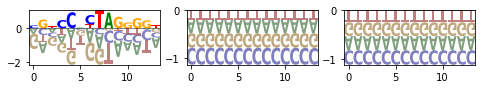

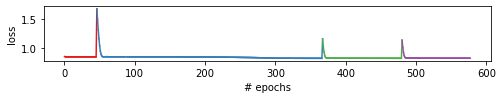




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 

kernels mask [0 0 0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.818927 , best epoch: -1 secs per epoch: 0.054 s
Epoch: 11, Loss: 0.818541 , best epoch: 8 secs per epoch: 0.062 s
Epoch: 21, Loss: 0.818564 , best epoch: 18 secs per epoch: 0.057 s
Epoch: 29, Loss: 0.8182 , best epoch: 18 secs per epoch: 0.055 s
early stop!
##DONE....




In [34]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization = 0
# for dirichlet_regularization_log in range(-5, 3):

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1

for ignore_kernel in [1]: # [0, 1]:
    print('\n\n##NEW JOB')
    print('ignore kernel', ignore_kernel)
    model_by_k, res_next = mb.tl.train_iterative(train, device, w=14, show_logo=True, optimize_motif_shift=True,
                                                 dirichlet_regularization=dirichlet_regularization, # 10 ** dirichlet_regularization_log,
                                                 lr=[0.01, 0.01, 0.01, 0.01], weight_decay=[0.01, 0.001, 0.001, 0.001], ignore_kernel=ignore_kernel,
                                                 num_epochs=1000, early_stopping=10, use_dinuc=False, # optimiser=torch.optim.LBFGS,
                                                 n_kernels=4, log_each=10, stop_at_kernel=None) #  seed=seed) # seeds.index[0]) # 
    print('##DONE....\n\n')
# res = []
# model_by_k = {}




##NEW JOB
ignore kernel 1
# rounds 1
# batches 1
# enr_series True
next w 14 <class 'int'>

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0
setting grad status of kernel at 4 to 0


before kernel optimization.


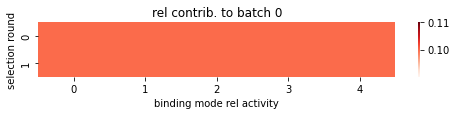


#activities
[[[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([y

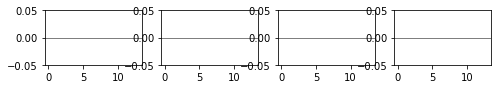

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([y

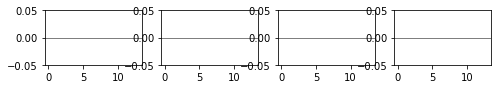

kernels mask [0 1 1 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.01, dir weight= 0
Epoch:  1, Loss: 0.847595 , best epoch: -1 secs per epoch: 0.051 s
Epoch: 11, Loss: 0.843993 , best epoch: 7 secs per epoch: 0.053 s
Epoch: 21, Loss: 0.843681 , best epoch: 12 secs per epoch: 0.050 s
Epoch: 31, Loss: 0.843686 , best epoch: 26 secs per epoch: 0.049 s
Epoch: 37, Loss: 0.8438 , best epoch: 26 secs per epoch: 0.048 s
early stop!

##After kernel opt / before shift optim.


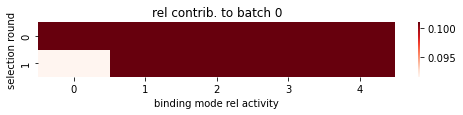


#activities
[[[0.99999464 0.908704  ]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.0957, -0.0957]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([y

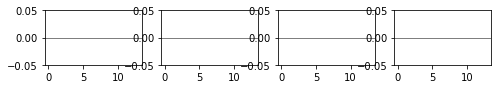

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([y

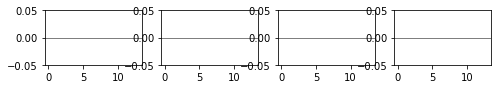

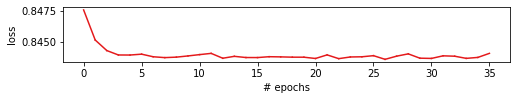

after shift optimz model


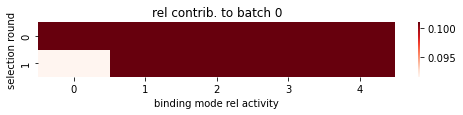


#activities
[[[0.99999464 0.908704  ]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.0957, -0.0957]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([y

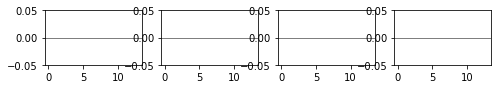

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([y

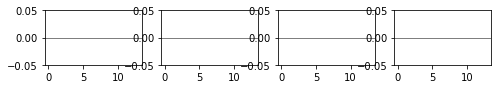

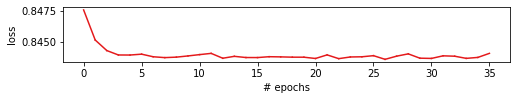




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 
kernel grad (4) = 1 

kernels mask [0 1 1 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.01, dir weight= 0
Epoch:  1, Loss: 0.844096 , best epoch: -1 secs per epoch: 0.059 s
Epoch: 11, Loss: 0.843798 , best epoch: 9 secs per epoch: 0.052 s
Epoch: 20, Loss: 0.8438 , best epoch: 9 secs per epoch: 0.052 s
early stop!

Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0
setting grad status of kernel at 4 to 0


before kernel optimization.


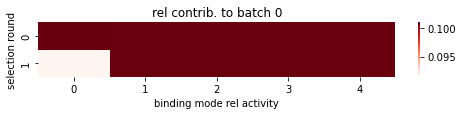


#activities
[[[1.000705   0.90596473]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.0988, -0.0988]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([y

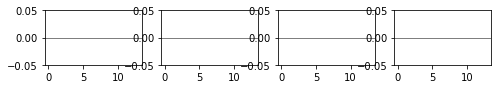

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([y

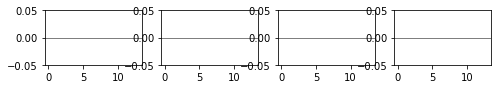

kernels mask [0 0 1 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 1.683157 , best epoch: -1 secs per epoch: 0.064 s
Epoch: 11, Loss: 0.843422 , best epoch: 9 secs per epoch: 0.065 s
Epoch: 21, Loss: 0.843856 , best epoch: 10 secs per epoch: 0.061 s
Epoch: 21, Loss: 0.8439 , best epoch: 10 secs per epoch: 0.061 s
early stop!

##After kernel opt / before shift optim.


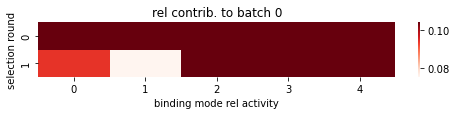


#activities
[[[1.000705   0.90596473]
  [0.999891   0.727087  ]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.4327, -0.4327]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


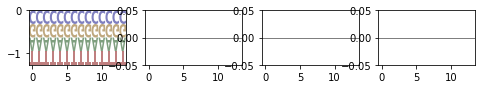

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


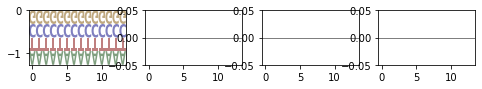

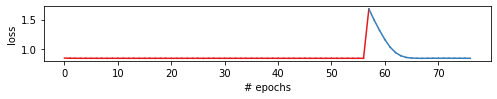


optimize_motif_shift (first)...next shift: -3
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.857499 , best epoch: -1 secs per epoch: 0.064 s
Epoch: 11, Loss: 0.857538 , best epoch: 1 secs per epoch: 0.062 s
Epoch: 12, Loss: 0.8575 , best epoch: 1 secs per epoch: 0.061 s
early stop!
next shift: -2
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.848101 , best epoch: -1 secs per epoch: 0.055 s
Epoch: 11, Loss: 0.848072 , best epoch: 5 secs per epoch: 0.061 s
Epoch: 16, Loss: 0.8481 , best epoch: 5 secs per epoch: 0.059 s
early stop!
next shift: -1
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.844115 , best epoch: -1 secs per epoch: 0.054 s
Epoch: 11, Loss: 0.84421

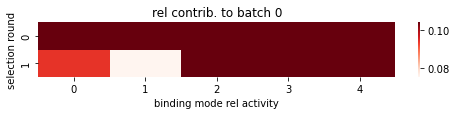


#activities
[[[1.000705   0.90596473]
  [0.999891   0.727087  ]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.4327, -0.4327]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


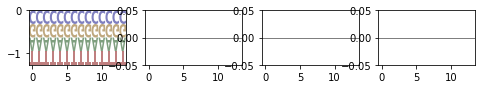

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


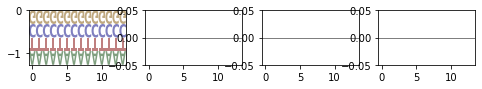

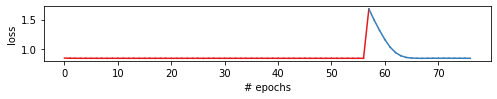




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 
kernel grad (4) = 1 

kernels mask [0 0 1 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.843921 , best epoch: -1 secs per epoch: 0.059 s
Epoch: 11, Loss: 0.842326 , best epoch: 9 secs per epoch: 0.061 s
Epoch: 21, Loss: 0.841173 , best epoch: 17 secs per epoch: 0.059 s
Epoch: 31, Loss: 0.840920 , best epoch: 26 secs per epoch: 0.059 s
Epoch: 41, Loss: 0.841236 , best epoch: 37 secs per epoch: 0.058 s
Epoch: 51, Loss: 0.840327 , best epoch: 44 secs per epoch: 0.058 s
Epoch: 61, Loss: 0.839981 , best epoch: 59 secs per epoch: 0.058 s
Epoch: 71, Loss: 0.839512 , best epoch: 69 secs per epoch: 0.058 s
Epoch: 81, Loss: 0.838279 , best epoch: 79 secs per epoch: 0.058 s
Epoch: 91, Loss: 0.837811 , best epoch: 89 

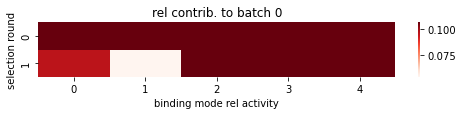


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [1.         1.        ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.1120, -1.1120]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


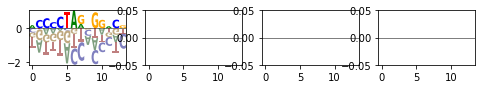

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


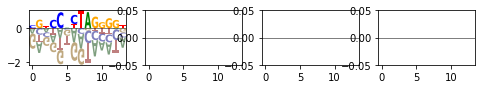

kernels mask [0 0 0 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 1.161543 , best epoch: -1 secs per epoch: 0.058 s
Epoch: 11, Loss: 0.819916 , best epoch: 7 secs per epoch: 0.063 s
Epoch: 21, Loss: 0.819240 , best epoch: 19 secs per epoch: 0.062 s
Epoch: 31, Loss: 0.819015 , best epoch: 28 secs per epoch: 0.062 s
Epoch: 41, Loss: 0.818476 , best epoch: 37 secs per epoch: 0.060 s
Epoch: 51, Loss: 0.818272 , best epoch: 48 secs per epoch: 0.060 s
Epoch: 59, Loss: 0.8182 , best epoch: 48 secs per epoch: 0.060 s
early stop!

##After kernel opt / before shift optim.


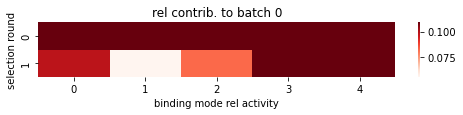


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [0.99999946 0.76001114]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.2544, -1.2544]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


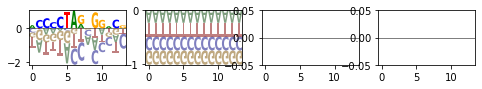

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


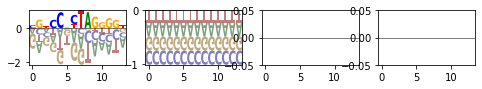

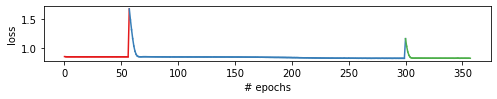


optimize_motif_shift (first)...next shift: -3
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.823957 , best epoch: -1 secs per epoch: 0.059 s
Epoch: 11, Loss: 0.823429 , best epoch: 8 secs per epoch: 0.065 s
Epoch: 19, Loss: 0.8237 , best epoch: 8 secs per epoch: 0.061 s
early stop!
next shift: -2
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.820758 , best epoch: -1 secs per epoch: 0.055 s
Epoch: 11, Loss: 0.820617 , best epoch: 4 secs per epoch: 0.068 s
Epoch: 15, Loss: 0.8208 , best epoch: 4 secs per epoch: 0.066 s
early stop!
next shift: -1
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.818927 , best epoch: -1 secs per epoch: 0.063 s
Epoch: 11, Loss: 0.81905

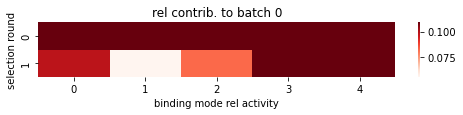


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [0.99999946 0.76001114]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.2544, -1.2544]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


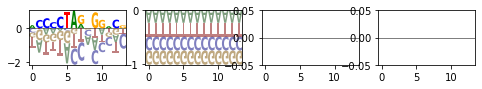

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


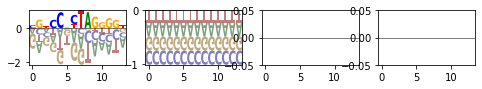

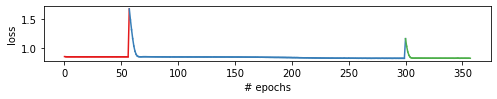




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 
kernel grad (4) = 1 

kernels mask [0 0 0 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.818743 , best epoch: -1 secs per epoch: 0.060 s
Epoch: 11, Loss: 0.817605 , best epoch: 5 secs per epoch: 0.065 s
Epoch: 21, Loss: 0.817599 , best epoch: 11 secs per epoch: 0.063 s
Epoch: 22, Loss: 0.8174 , best epoch: 11 secs per epoch: 0.063 s
early stop!

Kernel to optimize 3

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 1
setting grad status of kernel at 4 to 0


before kernel optimization.


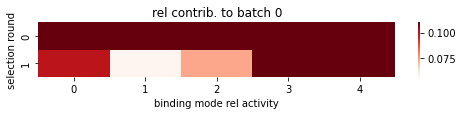


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [0.9995177  0.6668498 ]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.2046, -1.2046]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


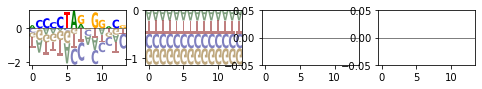

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])
/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


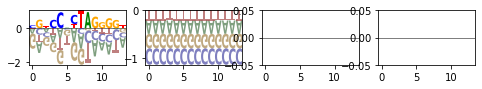

kernels mask [0 0 0 0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 1.121903 , best epoch: -1 secs per epoch: 0.058 s
Epoch: 11, Loss: 0.821874 , best epoch: 7 secs per epoch: 0.064 s
Epoch: 21, Loss: 0.820296 , best epoch: 18 secs per epoch: 0.061 s
Epoch: 31, Loss: 0.819983 , best epoch: 25 secs per epoch: 0.060 s
Epoch: 41, Loss: 0.819755 , best epoch: 39 secs per epoch: 0.059 s
Epoch: 51, Loss: 0.819359 , best epoch: 46 secs per epoch: 0.059 s
Epoch: 61, Loss: 0.819120 , best epoch: 56 secs per epoch: 0.058 s
Epoch: 71, Loss: 0.818750 , best epoch: 62 secs per epoch: 0.058 s
Epoch: 81, Loss: 0.818817 , best epoch: 73 secs per epoch: 0.059 s
Epoch: 84, Loss: 0.8190 , best epoch: 73 secs per epoch: 0.059 s
early stop!

##After kernel opt / before shift optim.


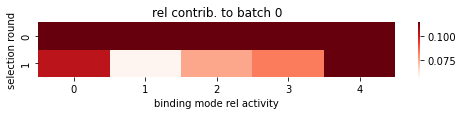


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [0.9995177  0.6668498 ]
  [0.99999946 0.7314114 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.2884, -1.2884]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


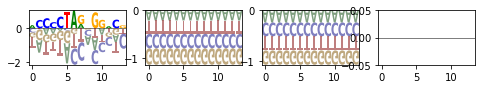

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


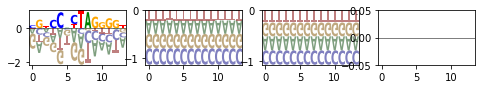

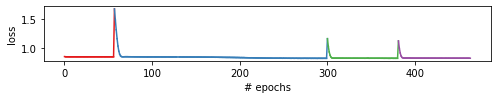


optimize_motif_shift (first)...next shift: -3
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.822578 , best epoch: -1 secs per epoch: 0.057 s
Epoch: 11, Loss: 0.822718 , best epoch: 3 secs per epoch: 0.061 s
Epoch: 21, Loss: 0.822802 , best epoch: 11 secs per epoch: 0.060 s
Epoch: 22, Loss: 0.8227 , best epoch: 11 secs per epoch: 0.060 s
early stop!
next shift: -2
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.820396 , best epoch: -1 secs per epoch: 0.055 s
Epoch: 11, Loss: 0.820813 , best epoch: 0 secs per epoch: 0.062 s
Epoch: 11, Loss: 0.8208 , best epoch: 0 secs per epoch: 0.062 s
early stop!
next shift: -1
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.8194

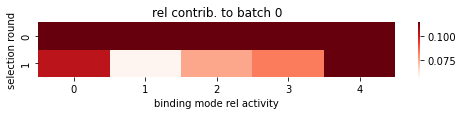


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [0.9995177  0.6668498 ]
  [0.99999946 0.7314114 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.2884, -1.2884]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


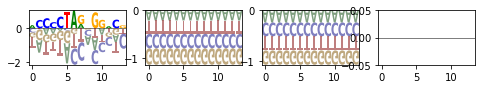

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


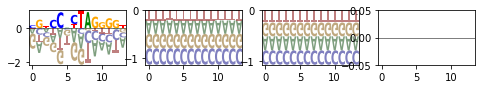

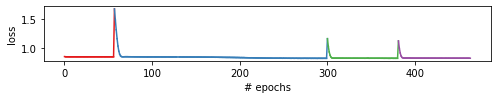




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 
kernel grad (4) = 1 

kernels mask [0 0 0 0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.818975 , best epoch: -1 secs per epoch: 0.059 s
Epoch: 11, Loss: 0.818560 , best epoch: 7 secs per epoch: 0.063 s
Epoch: 21, Loss: 0.818540 , best epoch: 12 secs per epoch: 0.060 s
Epoch: 23, Loss: 0.8182 , best epoch: 12 secs per epoch: 0.059 s
early stop!

Kernel to optimize 4

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0
setting grad status of kernel at 4 to 1


before kernel optimization.


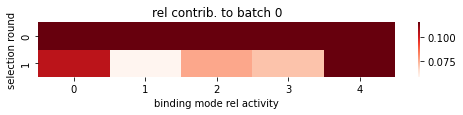


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [0.9995177  0.6668498 ]
  [1.0003777  0.6243589 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.2583, -1.2583]], requires_grad=True)


/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


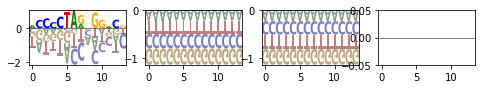

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/logomaker/src/Logo.py:1062: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.ax.set_ylim([ymin, ymax])


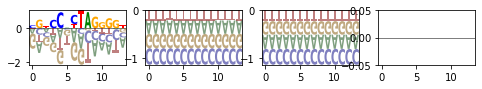

kernels mask [0 0 0 0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 1.099186 , best epoch: -1 secs per epoch: 0.060 s
Epoch: 11, Loss: 0.822675 , best epoch: 7 secs per epoch: 0.063 s
Epoch: 21, Loss: 0.821325 , best epoch: 17 secs per epoch: 0.060 s
Epoch: 31, Loss: 0.820604 , best epoch: 27 secs per epoch: 0.059 s
Epoch: 41, Loss: 0.820766 , best epoch: 38 secs per epoch: 0.058 s
Epoch: 51, Loss: 0.820515 , best epoch: 48 secs per epoch: 0.058 s
Epoch: 61, Loss: 0.820126 , best epoch: 57 secs per epoch: 0.058 s
Epoch: 71, Loss: 0.820039 , best epoch: 66 secs per epoch: 0.058 s
Epoch: 77, Loss: 0.8200 , best epoch: 66 secs per epoch: 0.057 s
early stop!

##After kernel opt / before shift optim.


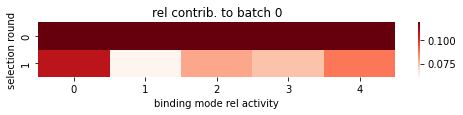


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [0.9995177  0.6668498 ]
  [1.0003777  0.6243589 ]
  [1.0000013  0.73898095]]]

#log_etas
Parameter containing:
tensor([[ 1.3431, -1.3431]], requires_grad=True)


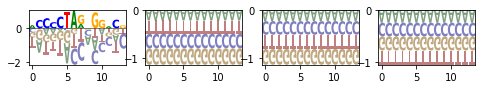

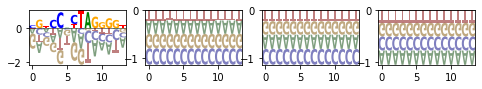

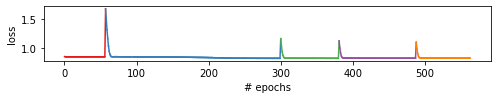


optimize_motif_shift (first)...next shift: -3
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.823654 , best epoch: -1 secs per epoch: 0.062 s
Epoch: 11, Loss: 0.823751 , best epoch: 8 secs per epoch: 0.063 s
Epoch: 21, Loss: 0.823669 , best epoch: 13 secs per epoch: 0.059 s
Epoch: 24, Loss: 0.8237 , best epoch: 13 secs per epoch: 0.059 s
early stop!
next shift: -2
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.822104 , best epoch: -1 secs per epoch: 0.056 s
Epoch: 11, Loss: 0.821936 , best epoch: 2 secs per epoch: 0.062 s
Epoch: 21, Loss: 0.821578 , best epoch: 16 secs per epoch: 0.059 s
Epoch: 27, Loss: 0.8217 , best epoch: 16 secs per epoch: 0.058 s
early stop!
next shift: -1
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>


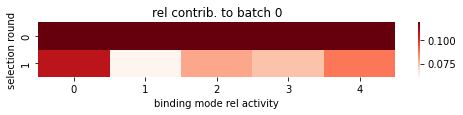


#activities
[[[1.000705   0.90596473]
  [0.99999595 0.5157939 ]
  [0.9995177  0.6668498 ]
  [1.0003777  0.6243589 ]
  [1.0000013  0.73898095]]]

#log_etas
Parameter containing:
tensor([[ 1.3431, -1.3431]], requires_grad=True)


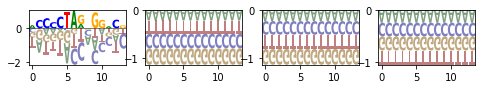

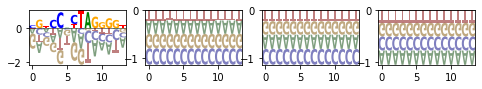

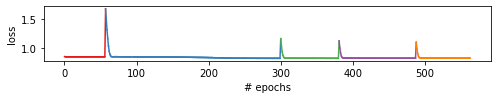




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 
kernel grad (4) = 1 

kernels mask [0 0 0 0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch:  1, Loss: 0.820146 , best epoch: -1 secs per epoch: 0.064 s
Epoch: 11, Loss: 0.819122 , best epoch: 8 secs per epoch: 0.065 s
Epoch: 21, Loss: 0.819182 , best epoch: 15 secs per epoch: 0.061 s
Epoch: 26, Loss: 0.8194 , best epoch: 15 secs per epoch: 0.061 s
early stop!
##DONE....




In [37]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization = 0
# for dirichlet_regularization_log in range(-5, 3):

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1

for ignore_kernel in [1]: # [0, 1]:
    print('\n\n##NEW JOB')
    print('ignore kernel', ignore_kernel)
    model_by_k, res_next = mb.tl.train_iterative(train, device, w=14, show_logo=True, optimize_motif_shift=True,
                                                 dirichlet_regularization=dirichlet_regularization, # 10 ** dirichlet_regularization_log,
                                                 lr=[0.01, 0.01, 0.01, 0.01, 0.01], weight_decay=[0.01, 0.001, 0.001, 0.001, 0.001], ignore_kernel=ignore_kernel,
                                                 num_epochs=1000, early_stopping=10, use_dinuc=False, # optimiser=torch.optim.LBFGS,
                                                 n_kernels=5, log_each=10, stop_at_kernel=None) #  seed=seed) # seeds.index[0]) # 
    print('##DONE....\n\n')
# res = []
# model_by_k = {}
